In [1]:
%load_ext autoreload
%autoreload 2

import seaborn as sns
import metapack as mp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display 
from collections import deque
from tqdm import tqdm_notebook as tqdm

%matplotlib inline
sns.set_context('notebook')
mp.jupyter.init()


In [2]:
pkg = mp.jupyter.open_package()
#pkg = mp.jupyter.open_source_package()
pkg

In [3]:
import datetime
import statsmodels.formula.api as sm
from cityiq import Config, CityIq
from cityiq.scrape import EventScraper
tz = datetime.datetime.now(datetime.timezone.utc).astimezone().tzinfo
from pathlib import Path

config = Config() # Assumes ~/.city-iq.yaml

c = CityIq(config) # Maybe will need this later

# Scrape events from Sept 2018
start_time = datetime.datetime(2018, 9, 1, 0, 0, tzinfo = tz)

s = EventScraper(config, start_time,  ['PKIN', 'PKOUT'])


In [40]:
from cityiq.clean_events import clean_events
locations = ['2byc1udh1jajlnw7b2b'] #,'jvfh0jtj8e8jlqxk5xi']

In [45]:
df = clean_events(s, locations=locations)
df.head()

,locationUid,delta,cs,delta_norm,cs_norm
time,,,,,
2018-09-12 15:00:00,2byc1udh1jajlnw7b2b,1,1,0,2
2018-09-12 15:15:00,2byc1udh1jajlnw7b2b,-1,0,-1,1
2018-09-12 15:30:00,2byc1udh1jajlnw7b2b,0,0,0,1
2018-09-12 15:45:00,2byc1udh1jajlnw7b2b,0,0,0,1
2018-09-12 16:00:00,2byc1udh1jajlnw7b2b,0,0,0,1


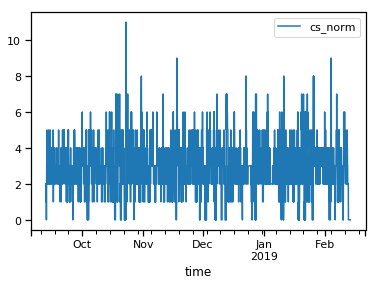

In [47]:
df.plot(y='cs_norm')


In [43]:
list(s.iterate_splits(locations=))


SyntaxError: invalid syntax (<ipython-input-43-7f5fcb671c70>, line 1)

In [52]:
t = df.index.min()
t.year, t.month

(2018, 9)